<a href="https://colab.research.google.com/github/camiyuka/Java-DIO/blob/main/c%C3%B3pia_final_03_10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Exercício: Classificação de Dígitos Manuscritos com uma Rede Neural Objetivo: Construir uma rede neural para classificar dígitos manuscritos do conjunto de dados MNIST. Passos:

Importe as bibliotecas necessárias, como TensorFlow ou PyTorch, e carregue o conjunto de dados MNIST. O conjunto de dados MNIST contém imagens em escala de cinza de dígitos manuscritos de 0 a 9.

Pré-processamento de dados:
• Normalize as imagens para que os valores dos pixels estejam no intervalo [0, 1].
• Converta os rótulos para o formato one-hot encoding.
Divida o conjunto de dados em conjuntos de treinamento, validação e teste. Use, por exemplo, uma proporção de 70% para treinamento, 15% para validação e 15% para teste.
Crie uma rede neural artificial simples com a seguinte arquitetura:
• Uma camada de entrada com o número correto de neurônios para representar as imagens MNIST (geralmente 28x28 pixels = 784 neurônios).
• Pelo menos uma camada oculta com uma quantidade de neurônios de sua escolha.
• Uma camada de saída com 10 neurônios, um para cada classe de dígito de 0 a 9.

Escolha uma função de perda apropriada, como a entropia cruzada categórica (categorical cross-entropy), e um otimizador, como o Gradiente Descendente Estocástico (SGD).
Treine a rede neural usando o conjunto de treinamento e monitore o desempenho usando o conjunto de validação. Ajuste os parâmetros, como a taxa de aprendizado e o número de neurônios na camada oculta, conforme necessário.
Avalie o desempenho final da rede neural usando o conjunto de teste.



In [1]:
# bibliotecas
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers, models
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [2]:
# carregar o dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()


11490434/11490434 [==============================] - 1s 0us/step


In [3]:
# pré- processamento das imagens [0,1]
# Normalização (redimensionamento de 0 a 1)
x_train = x_train.astype('float32') / 255.0

In [4]:
# One-hot encoding dos rótulos
y_train = tf.keras.utils.to_categorical(y_train, num_classes=10)

In [5]:
# Divisão do dataset em 70% treinamento, 15% teste e 15% validação
x_train, x_temp, y_train, y_temp = train_test_split(x_train, y_train, test_size=0.3)
x_test, x_val, y_test, y_val = train_test_split(x_temp, y_temp, test_size=0.5)

In [6]:
print("Treinamento:", x_train.shape)
print("Teste:", x_test.shape)
print("Validação:", x_val.shape)

Treinamento: (42000, 28, 28)
Teste: (9000, 28, 28)
Validação: (9000, 28, 28)


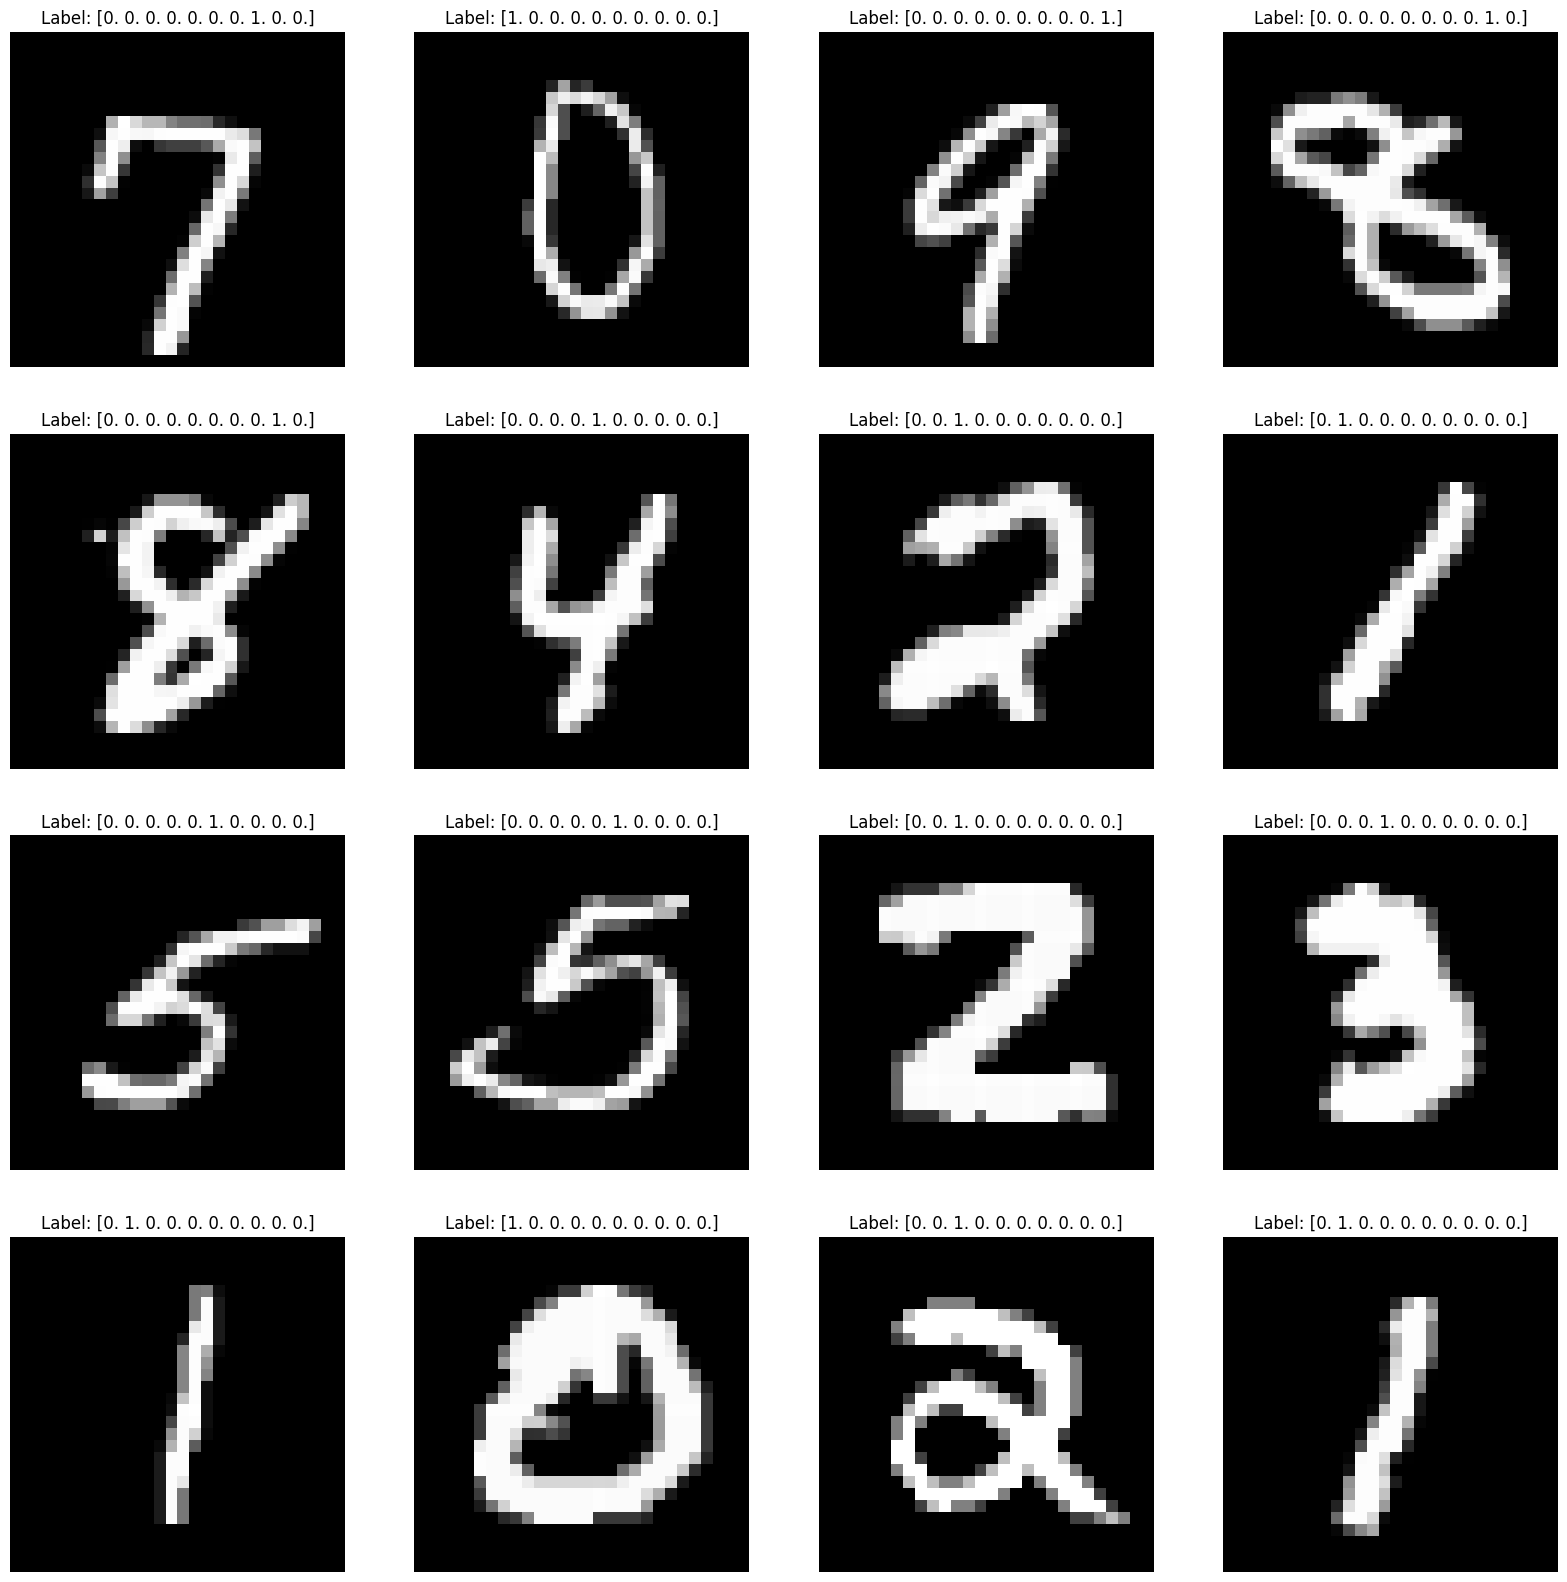

In [7]:
random_indices = np.random.choice(x_train.shape[0], 16)

plt.figure(figsize=(20, 20))
for i, idx in enumerate(random_indices):
  plt.subplot(4, 4, i+1)
  plt.imshow(x_train[idx], cmap='gray')
  plt.title(f'Label: {y_train[idx]}')
  plt.axis('off')
plt.show()


In [8]:
# Criar a arquitetura da rede neural com ativação tangente hiperbólica (tanh)
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),  # Camada de entrada
    tf.keras.layers.Dense(128, activation='tanh'),  # Camada oculta com 128 neurônios e ativação tangente hiperbólica (tanh)
    tf.keras.layers.Dense(10, activation='softmax')  # Camada de saída com 10 neurônios (um para cada classe) e ativação softmax
])

In [9]:
# Escolher função de perda e otimizador
model.compile(optimizer='adam',  # Gradiente Descendente Estocástico (SGD)
              loss='categorical_crossentropy',  # Função de perda: Entropia cruzada categórica
              metrics=['accuracy'])


In [15]:
# Treinar a rede neural
history = model.fit(x_train, y_train, epochs=10, batch_size=32, validation_data=(x_val, y_val))


Epoch 1/10
1313/1313 [==============================] - 10s 8ms/step - loss: 0.0347 - accuracy: 0.9908 - val_loss: 0.0885 - val_accuracy: 0.9746
Epoch 2/10
1313/1313 [==============================] - 7s 5ms/step - loss: 0.0236 - accuracy: 0.9944 - val_loss: 0.0794 - val_accuracy: 0.9770
Epoch 3/10
1313/1313 [==============================] - 5s 4ms/step - loss: 0.0180 - accuracy: 0.9959 - val_loss: 0.0807 - val_accuracy: 0.9776
Epoch 4/10
1313/1313 [==============================] - 6s 4ms/step - loss: 0.0139 - accuracy: 0.9971 - val_loss: 0.0838 - val_accuracy: 0.9769
Epoch 5/10
1313/1313 [==============================] - 5s 4ms/step - loss: 0.0106 - accuracy: 0.9978 - val_loss: 0.0845 - val_accuracy: 0.9764
Epoch 6/10
1313/1313 [==============================] - 5s 4ms/step - loss: 0.0091 - accuracy: 0.9981 - val_loss: 0.0851 - val_accuracy: 0.9770
Epoch 7/10
1313/1313 [==============================] - 6s 5ms/step - loss: 0.0081 - accuracy: 0.9985 - val_loss: 0.0961 - val_accuracy

In [16]:
# Avaliar o desempenho final no conjunto de teste
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f"Acurácia no conjunto de teste: {test_accuracy*100:.2f}%")

282/282 [==============================] - 1s 2ms/step - loss: 0.1121 - accuracy: 0.9716
Acurácia no conjunto de teste: 97.16%


In [17]:
# Fazer previsões no conjunto de teste e visualizar algumas previsões
predictions = model.predict(x_test)
num_images_to_show = 5
random_indices = np.random.choice(len(x_test), num_images_to_show)


282/282 [==============================] - 0s 2ms/step


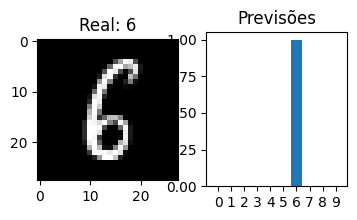

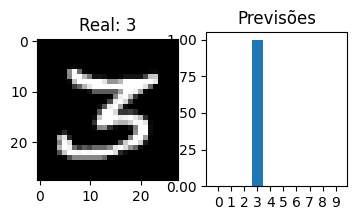

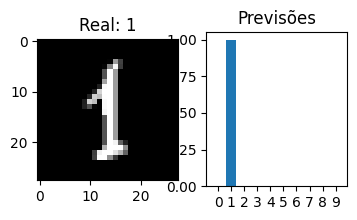

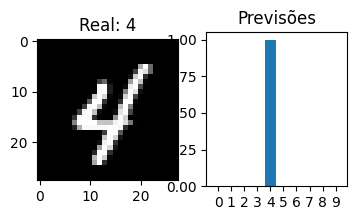

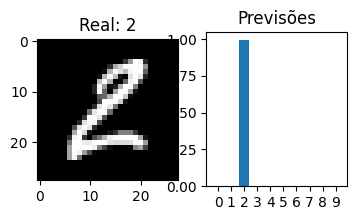

In [18]:
for i in random_indices:
    plt.figure(figsize=(4, 2))

    plt.subplot(1, 2, 1)
    plt.imshow(x_test[i], cmap='gray')
    plt.title(f"Real: {np.argmax(y_test[i])}")

    plt.subplot(1, 2, 2)
    plt.bar(range(10), predictions[i])
    plt.title("Previsões")
    plt.xticks(range(10), [str(i) for i in range(10)])

    plt.show()

282/282 [==============================] - 0s 2ms/step


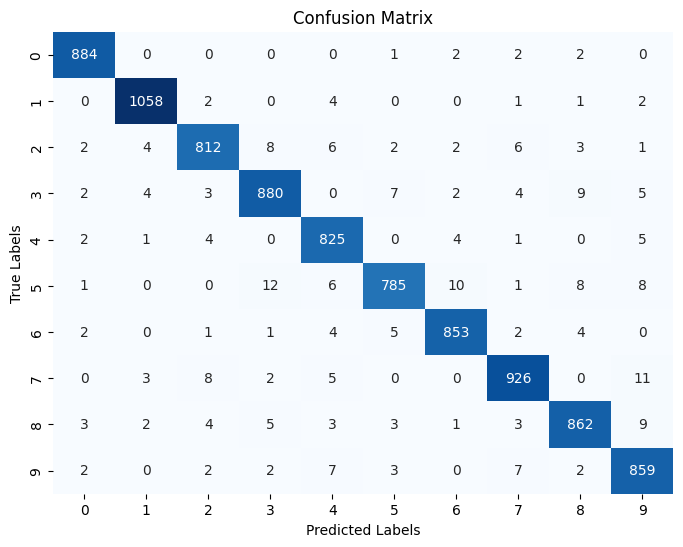

In [19]:
from sklearn.metrics import confusion_matrix

# Fazer previsões no conjunto de teste
y_pred = model.predict(x_test)

# Converter previsões para rótulos
y_pred_labels = np.argmax(y_pred, axis=1)
y_true_labels = np.argmax(y_test, axis=1)

# Criar a matriz de confusão
confusion = confusion_matrix(y_true_labels, y_pred_labels)

# Mostrar a matriz de confusão usando Seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()
